In [1]:
%matplotlib notebook
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler, Normalizer

In [2]:
# Load an color image in grayscale
path = '../processed/data_aligned/'
image_name = 'frame_det_00_000002.bmp'
img = cv2.imread(path+ image_name,1)

In [3]:
cv2.imshow('image',img)
cv2.waitKey(1)
cv2.destroyAllWindows()

In [4]:
r_avg = []
g_avg = []
b_avg = []

for image_path in os.listdir(path):
    # create the full input path and read the file
    input_path = os.path.join(path, image_path)
    image_to_display = cv2.imread(input_path)
    
    r_avg.append(np.average(image_to_display[:,:,0]))
    g_avg.append(np.average(image_to_display[:,:,1]))
    b_avg.append(np.average(image_to_display[:,:,2]))
    
r = np.asarray(r_avg).reshape(1,-1) / 255
g = np.asarray(g_avg).reshape(1,-1) / 255
b = np.asarray(b_avg).reshape(1,-1) / 255

In [5]:
print(np.min(r_avg))

0.15040672519007603


In [95]:
# use to normalize 
# scaler = Normalizer()
# r = scaler.fit_transform(r_avg)
# g = scaler.fit_transform(g_avg) 
# b = scaler.fit_transform(b_avg)

(1, 1208)


<IPython.core.display.Javascript object>


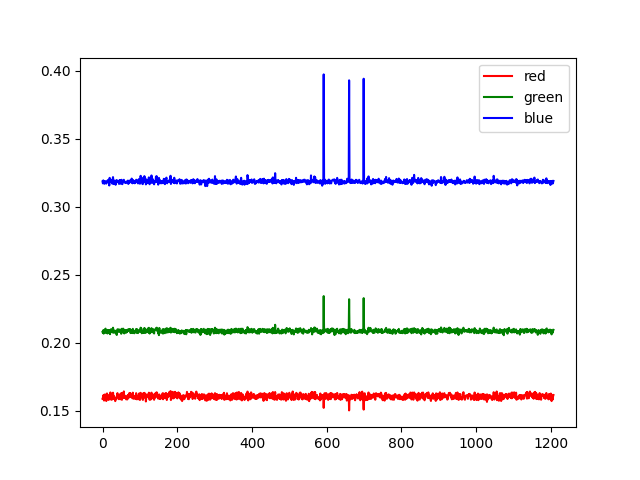

In [9]:
# plot
n_frames = np.arange(len(os.listdir(path))).reshape(1,-1)
print(n_frames.shape)
# print(r.shape)
plt.plot(n_frames.T, r_avg.T, color='red', label = 'red')
plt.plot(n_frames.T, g_avg.T, color='green', label='green')
plt.plot(n_frames.T, b_avg.T, color='blue', label='blue')
plt.legend()